# **Dataset Description**
 
The data in out dataset was gathered by The Behavioral Risk Factor Surveillance System (BRFSS), the U.S’ premier system of health-related telephone surveys. They collected data about residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. The original dataset contains 304 unique variables.

**Link to the dataset**: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

# Transformations:
1. Since the given dataset (from Kaggle) is pretty large for our needs, we decided to drop some columns and remain with the following 5 variables: Heart disease (binary), Sex (binary for our purpose), Age, BMI and Alcohol Consumption. 
2. We changed the values in the 'Heart_Disease' column from no/yes to 0/1 respectively.
3. In the 'Sex' column, we changed the value of Male and Female to 0 and 1 respectively.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
df = pd.read_csv('/data/notebook_files/CVD_cleaned.csv')

In [21]:
# Binary columns transformation

df['Heart_Disease'] = df['Heart_Disease'].map({'Yes': 1, 'No': 0})
df['Sex'] = df['Sex'].map({'Female': 1, 'Male': 0})

In [22]:
# Dropping columns we don't need

df.drop(columns=['General_Health','Checkup','Exercise','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Smoking_History','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption', 'Weight_(kg)', 'Height_(cm)'], inplace=True)
df.head()

,Heart_Disease,Sex,Age_Category,BMI,Alcohol_Consumption
0,0,1,70-74,14.54,0.0
1,1,1,70-74,28.29,0.0
2,0,1,60-64,33.47,4.0
3,1,0,75-79,28.73,0.0
4,0,0,80+,24.37,0.0


Our dataset contains 5 variables:
1. Heart disease: Indicating whether the person has coronary heart disease or mycardialinfarction.
2. BMI (Body Mass Index): A common scale to categorize a person based on tissue mass (muscle, fat, and bone) and height.
3. Alcohol consumption
4. Age category (4 years span groups between 18-80 and a 80+ category)
5. Gender

# Exploratory data analysis

In [23]:
num_rows = df.shape[0]

print("Number of rows in the DataFrame:", num_rows)

Number of rows in the DataFrame: 308854


In [24]:
# Checking for missing data
df.isnull().sum()

Heart_Disease 0
Sex 0
Age_Category 0
BMI 0
Alcohol_Consumption 0
dtype: int64

We can see that there is no missing data in the dataset.

In [25]:
df.dtypes

Heart_Disease int64
Sex int64
Age_Category object
BMI float64
Alcohol_Consumption float64
dtype: object

# Variables summary:

# BMI:

In [26]:
print("BMI data summarized:")
print(df["BMI"].describe())

BMI data summarized:
count    308854.000000
mean         28.626211
std           6.522323
min          12.020000
25%          24.210000
50%          27.440000
75%          31.850000
max          99.330000
Name: BMI, dtype: float64


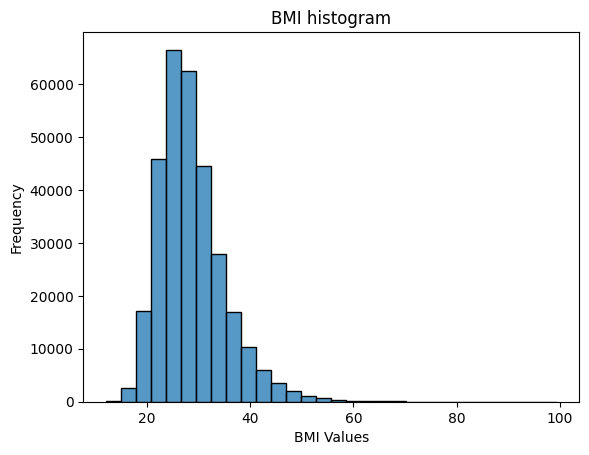

In [27]:
sns.histplot(data=df, x='BMI', bins=30)  

plt.title('BMI histogram')
plt.xlabel('BMI Values')
plt.ylabel('Frequency')

plt.show()

The BMI seems to have a long right tail (indicating overweight people).

# Alcohol consumption:

In [28]:
unique_values = df['Alcohol_Consumption'].unique()

print(f"Unique alcohol consumption values: {unique_values}")

print(df["Alcohol_Consumption"].describe())

Unique alcohol consumption values: [ 0.  4.  3.  8. 30.  2. 12.  1.  5. 10. 20. 17. 16.  6. 25. 28. 15.  7.
  9. 24. 11. 29. 27. 14. 21. 23. 18. 26. 22. 13. 19.]
count    308854.000000
mean          5.096366
std           8.199763
min           0.000000
25%           0.000000
50%           1.000000
75%           6.000000
max          30.000000
Name: Alcohol_Consumption, dtype: float64


Although the values in the 'Alcohol_Consumption' column are whole numbers between [0,30], we will refer to this variable as continious.

Text(0.5, 1.0, 'Alcohol Consuming Distribution')

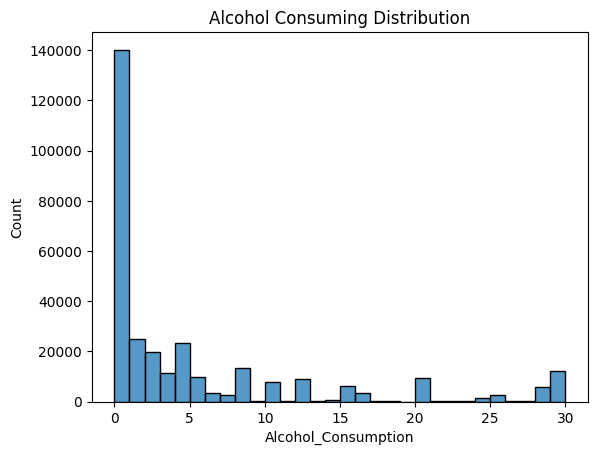

In [29]:
sns.histplot(x = 'Alcohol_Consumption', data = df, multiple = 'stack', bins = 30).set_title('Alcohol Consuming Distribution')

As we can see, a large portion of people do not consume alcohol at all. Below is the histogram in a log scale to see the difference between the positive values more clearly.

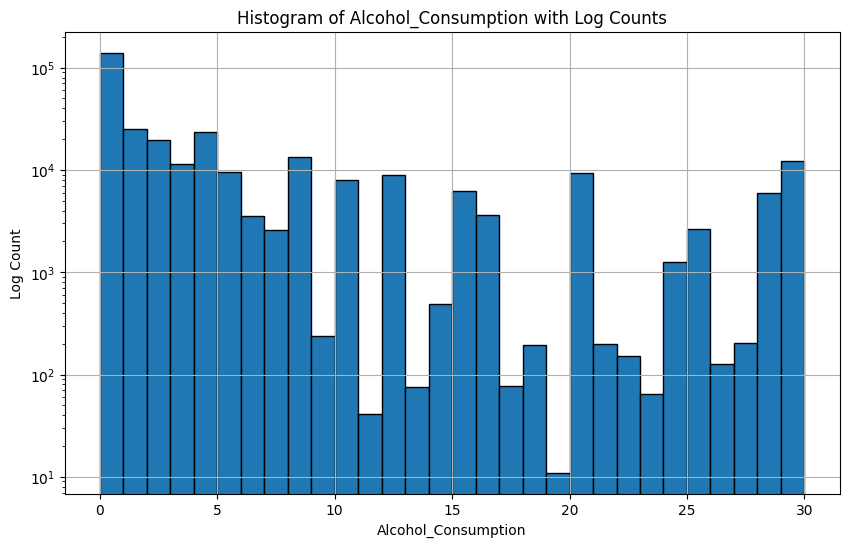

In [30]:
#Displaying log counts of Alcohol Consumption
copied_df = df.copy()
copied_df['Alcohol_Consumption'] = df['Alcohol_Consumption'] + 0.000001  # Add a small constant to avoid log(0)
plt.figure(figsize=(10, 6))

copied_df['Alcohol_Consumption'].hist(log=True, bins=30, edgecolor='black')
plt.title(f'Histogram of Alcohol_Consumption with Log Counts')
plt.xlabel('Alcohol_Consumption')
plt.ylabel('Log Count')
plt.show()

# Age category:

We cannot show accurate data about age (mean, std, etc.) since not only we don't have the exact age of the responders, there is also the 80+ age category, which is quite large as shown in the chart below, and we have no way to tell how the responders' age distribute within that category.

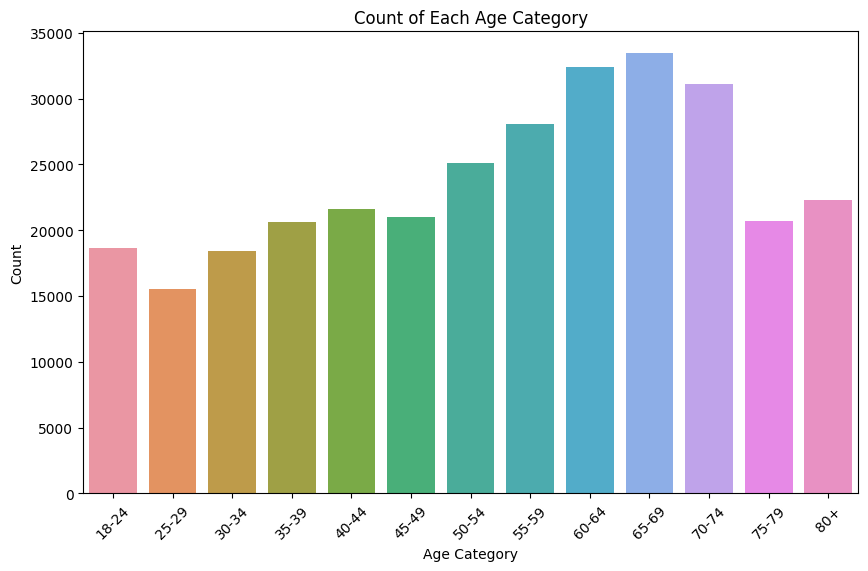

In [31]:


age_counts = df['Age_Category'].value_counts().sort_index(ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Count of Each Age Category')
plt.xticks(rotation=45)  
plt.show()

As we can see above that Individuals in higher age group have a higher amount of Heart Disease.

# Gender:

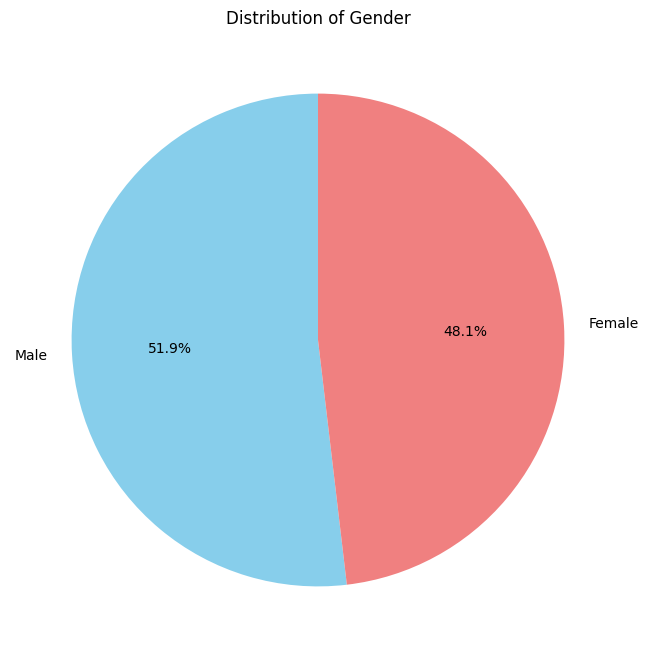

In [32]:
sex_counts = df['Sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender')
plt.show()

We can see that the percentage of males with heart disease is slightly higher than females.

# Heart disease:

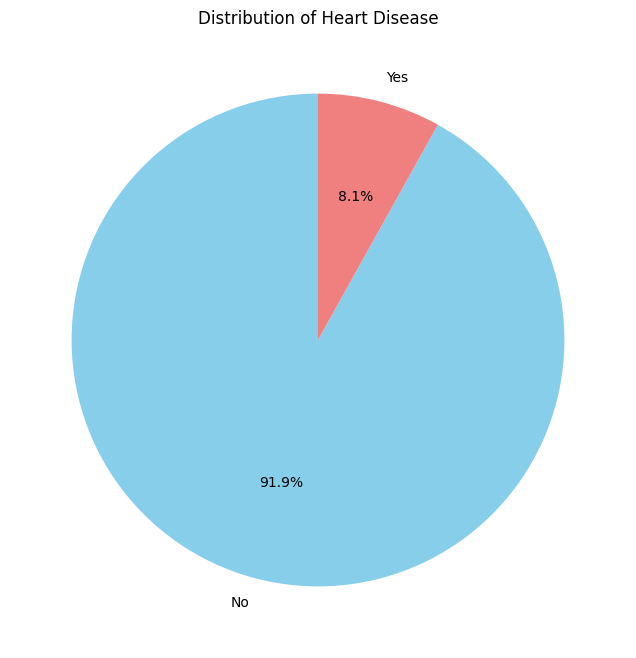

In [33]:
hd_counts = df['Heart_Disease'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(hd_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Heart Disease')
plt.show()

# Research questions
1. Does an increase in alcohol consumption cause an increase in the BMI index?
2. Does an increase in alcohol consumption cause an increase in the chance of heart disease?
3. Is there a difference in alcohol consumption between men and women?